In [21]:
# import libraries 
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
# Get the total number of columns (optional, only if unknown)
total_columns = pd.read_csv('renewable_power_plants_DE_filtered.csv', nrows=1).shape[1]

# Specify the columns to include (exclude 14 and 19)
columns_to_include = [i for i in range(total_columns) if i not in [14, 19]]

# Read the data while keeping only the included columns
data = pd.read_csv('renewable_power_plants_DE_filtered.csv', usecols=columns_to_include)


In [16]:
data.head()

,electrical_capacity,energy_source_level_1,energy_source_level_2,energy_source_level_3,technology,data_source,nuts_1_region,nuts_2_region,nuts_3_region,lon,...,municipality,municipality_code,postcode,federal_state,commissioning_date,decommissioning_date,voltage_level,dso,dso_id,tso
0,0.001404,Renewable energy,Solar,NaN,Photovoltaics,TransnetBW,DE1,DE14,DE142,9.094415,...,NaN,8416041.0,72074.0,Baden-Württemberg,1984-05-01,NaN,low voltage,Stadtwerke Tübingen GmbH,10000434.0,TransnetBW
1,0.002368,Renewable energy,Solar,NaN,Photovoltaics,TransnetBW,DE1,DE14,DE142,9.043695,...,NaN,8416041.0,72076.0,Baden-Württemberg,1985-06-01,NaN,low voltage,Stadtwerke Tübingen GmbH,10000434.0,TransnetBW
2,0.001200,Renewable energy,Solar,NaN,Photovoltaics,TenneT,DE7,DE73,DE734,9.466604,...,NaN,6633026.0,34246.0,Hamburg,1985-07-01,NaN,low voltage,EAM Netz GmbH,10003990.0,TenneT
3,0.003800,Renewable energy,Solar,NaN,Photovoltaics,TransnetBW,DE1,DE14,DE142,9.044784,...,NaN,8416041.0,72072.0,Baden-Württemberg,1986-05-01,NaN,low voltage,Stadtwerke Tübingen GmbH,10000434.0,TransnetBW
4,0.003100,Renewable energy,Solar,NaN,Photovoltaics,TransnetBW,DE1,DE14,DE142,9.044784,...,NaN,8416041.0,72072.0,Baden-Württemberg,1986-06-01,NaN,low voltage,Stadtwerke Tübingen GmbH,10000434.0,TransnetBW


In [17]:
# inspect and clean the data
data.dtypes

electrical_capacity      float64
energy_source_level_1     object
energy_source_level_2     object
energy_source_level_3    float64
technology                object
data_source               object
nuts_1_region             object
nuts_2_region             object
nuts_3_region             object
lon                      float64
lat                      float64
municipality              object
municipality_code        float64
postcode                 float64
federal_state             object
commissioning_date        object
decommissioning_date     float64
voltage_level             object
dso                       object
dso_id                   float64
tso                       object
dtype: object

In [18]:
data.info


<bound method DataFrame.info of          electrical_capacity energy_source_level_1 energy_source_level_2  \
0                   0.001404      Renewable energy                 Solar   
1                   0.002368      Renewable energy                 Solar   
2                   0.001200      Renewable energy                 Solar   
3                   0.003800      Renewable energy                 Solar   
4                   0.003100      Renewable energy                 Solar   
...                      ...                   ...                   ...   
1894947             0.009920      Renewable energy                 Solar   
1894948             0.009750      Renewable energy                 Solar   
1894949             0.006500      Renewable energy                 Solar   
1894950             0.009800      Renewable energy                 Solar   
1894951             0.009975      Renewable energy                 Solar   

         energy_source_level_3     technology data_sour

In [19]:
# Check for missing values in key columns
print(data[['electrical_capacity', 'energy_source_level_1']].isnull().sum())

# Drop rows with missing values in important columns (optional)
data = data.dropna(subset=['electrical_capacity', 'energy_source_level_1'])

# Convert electrical_capacity to numeric if needed
data['electrical_capacity'] = pd.to_numeric(data['electrical_capacity'], errors='coerce')

# Check unique values in energy_source_level_1
print(data['energy_source_level_1'].unique())


electrical_capacity      0
energy_source_level_1    0
dtype: int64
['Renewable energy']


In [20]:
# Group by energy source and sum electrical capacity
energy_by_source = data.groupby('energy_source_level_1')['electrical_capacity'].sum().reset_index()

# Sort by capacity for better visualization
energy_by_source = energy_by_source.sort_values(by='electrical_capacity', ascending=False)

# Display the results
print(energy_by_source)


  energy_source_level_1  electrical_capacity
0      Renewable energy         50508.379862


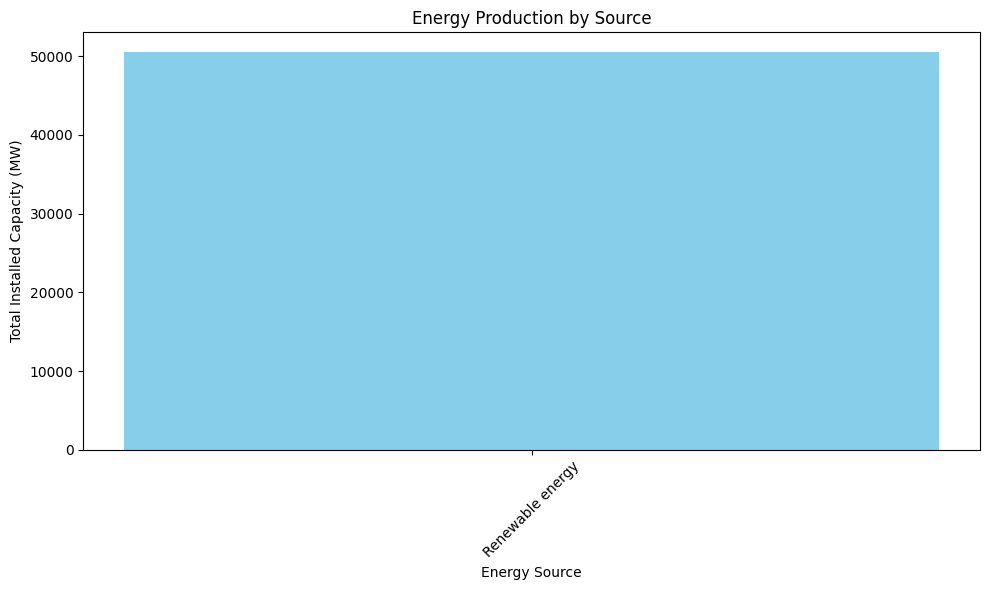

In [22]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(energy_by_source['energy_source_level_1'], energy_by_source['electrical_capacity'], color='skyblue')
plt.xlabel('Energy Source')
plt.ylabel('Total Installed Capacity (MW)')
plt.title('Energy Production by Source')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


    is_renewable  electrical_capacity
0  Non-Renewable         50508.379862


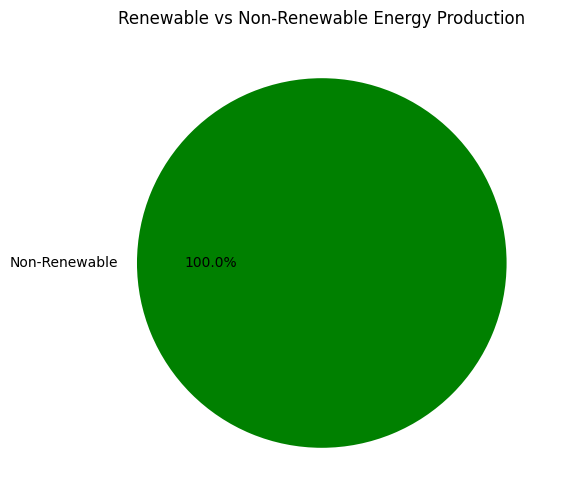

In [23]:
# Define renewable energy sources
renewable_sources = ['Wind', 'Solar', 'Biomass', 'Hydropower']  # Adjust based on your dataset

# Add a new column for renewable classification
data['is_renewable'] = data['energy_source_level_1'].apply(lambda x: 'Renewable' if x in renewable_sources else 'Non-Renewable')

# Group by renewable/non-renewable and sum capacity
renewable_analysis = data.groupby('is_renewable')['electrical_capacity'].sum().reset_index()

# Display the results
print(renewable_analysis)

# Visualize
plt.figure(figsize=(6, 6))
plt.pie(renewable_analysis['electrical_capacity'], labels=renewable_analysis['is_renewable'], autopct='%1.1f%%', colors=['green', 'grey'])
plt.title('Renewable vs Non-Renewable Energy Production')
plt.show()


In [24]:
# Check data types and unique values in key columns
print(data.info())
print(data['energy_source_level_1'].unique())  # Unique values for energy source
print(data['electrical_capacity'].head())      # Check numerical capacity values

# Ensure 'electrical_capacity' is numeric
data['electrical_capacity'] = pd.to_numeric(data['electrical_capacity'], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894952 entries, 0 to 1894951
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   electrical_capacity    float64
 1   energy_source_level_1  object 
 2   energy_source_level_2  object 
 3   energy_source_level_3  float64
 4   technology             object 
 5   data_source            object 
 6   nuts_1_region          object 
 7   nuts_2_region          object 
 8   nuts_3_region          object 
 9   lon                    float64
 10  lat                    float64
 11  municipality           object 
 12  municipality_code      float64
 13  postcode               float64
 14  federal_state          object 
 15  commissioning_date     object 
 16  decommissioning_date   float64
 17  voltage_level          object 
 18  dso                    object 
 19  dso_id                 float64
 20  tso                    object 
 21  is_renewable           object 
dtypes: float64(8), obj

In [25]:
# Grouping by energy source
energy_by_source = (
    data.groupby('energy_source_level_1')['electrical_capacity']
    .sum()
    .reset_index()
    .sort_values(by='electrical_capacity', ascending=False)
)

# Check the aggregated data
print(energy_by_source)


  energy_source_level_1  electrical_capacity
0      Renewable energy         50508.379862


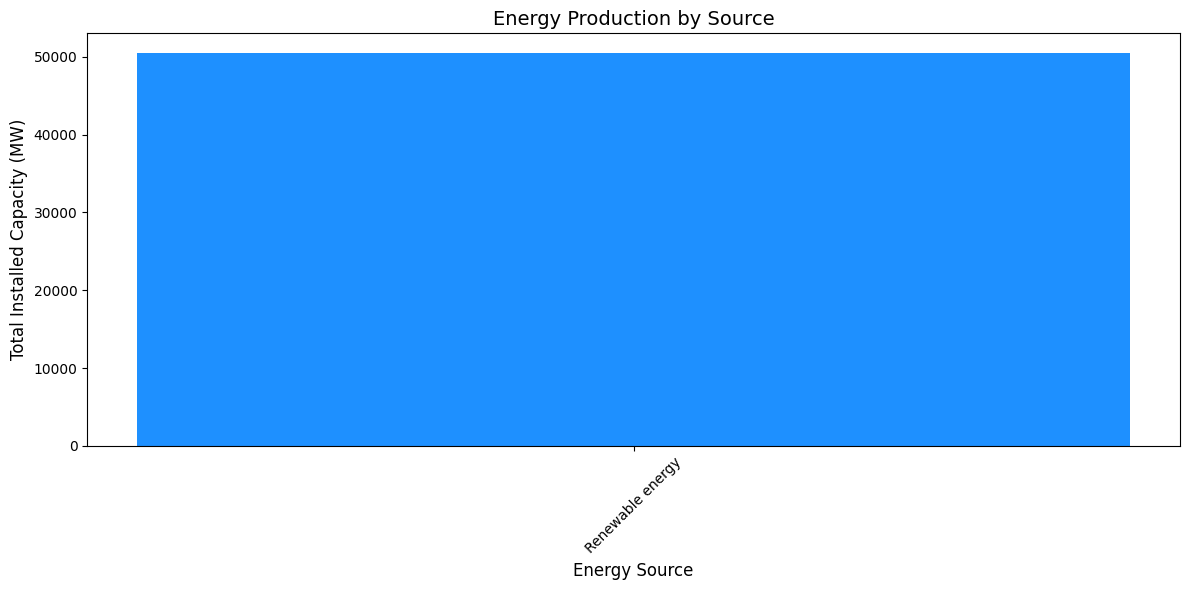

In [26]:
import matplotlib.pyplot as plt

# Bar Plot for Energy Production by Source
plt.figure(figsize=(12, 6))
plt.bar(
    energy_by_source['energy_source_level_1'],
    energy_by_source['electrical_capacity'],
    color='dodgerblue'
)
plt.xlabel('Energy Source', fontsize=12)
plt.ylabel('Total Installed Capacity (MW)', fontsize=12)
plt.title('Energy Production by Source', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


In [27]:
# Define renewable energy sources
renewable_sources = ['Wind', 'Solar', 'Biomass', 'Hydropower', 'Geothermal']  # Update based on your dataset

# Add a column for renewable classification
data['is_renewable'] = data['energy_source_level_1'].apply(
    lambda x: 'Renewable' if x in renewable_sources else 'Non-Renewable'
)

# Group and aggregate by renewable vs non-renewable
renewable_summary = (
    data.groupby('is_renewable')['electrical_capacity']
    .sum()
    .reset_index()
)

print(renewable_summary)


    is_renewable  electrical_capacity
0  Non-Renewable         50508.379862


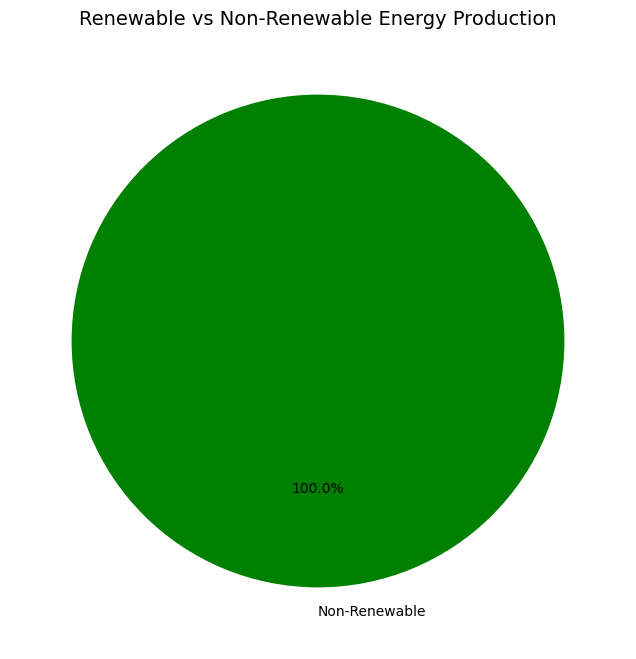

In [28]:
# Pie Chart for Renewable vs Non-Renewable
plt.figure(figsize=(8, 8))
plt.pie(
    renewable_summary['electrical_capacity'],
    labels=renewable_summary['is_renewable'],
    autopct='%1.1f%%',
    colors=['green', 'gray'],
    startangle=90
)
plt.title('Renewable vs Non-Renewable Energy Production', fontsize=14)
plt.show()


  energy_source_level_2  electrical_capacity
0                 Solar         50508.379862


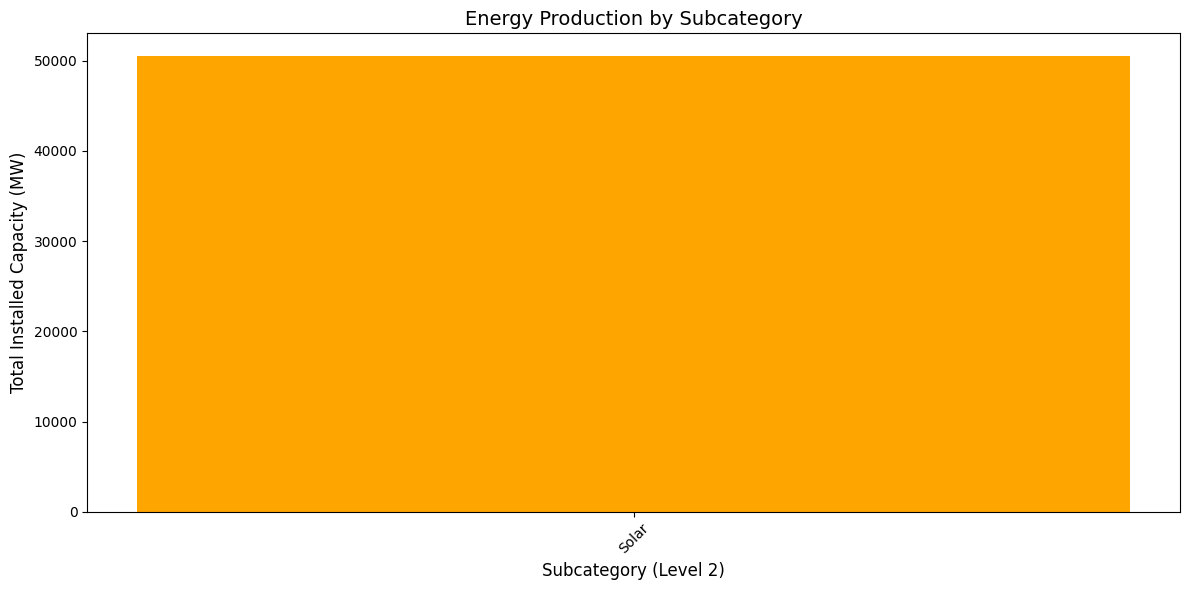

In [29]:
# Grouping by subcategories in energy_source_level_2
subcategories = (
    data.groupby('energy_source_level_2')['electrical_capacity']
    .sum()
    .reset_index()
    .sort_values(by='electrical_capacity', ascending=False)
)

print(subcategories)

# Visualization for subcategories
plt.figure(figsize=(12, 6))
plt.bar(
    subcategories['energy_source_level_2'],
    subcategories['electrical_capacity'],
    color='orange'
)
plt.xlabel('Subcategory (Level 2)', fontsize=12)
plt.ylabel('Total Installed Capacity (MW)', fontsize=12)
plt.title('Energy Production by Subcategory', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()
